In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as venn
from matplotlib_venn import venn3
from venn import venn 
from textwrap import wrap
import venn
from venn import venn
import re
import seaborn as sns
from pandas import DataFrame
import math 

In [63]:
import os
for dirname, _, filenames in os.walk('/Users/tianyisun/Desktop/NLQbatches/batch1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_annotationtask_sql_errorcategory.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/record_id-code_Krippendroffis_alpha.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/annotation_feedback_coded_tianyi.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_category_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/description-code.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/.DS_Store
/Users/tianyisun/Desktop/NLQbatches/batch1/46iter1_stability.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/First-round error type annotation.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/anntask.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/ann3_description.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/descri-code_Fleiss_kappa.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/batch1_anntask_sql_type.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/mapping.csv
/Users/tianyisun/Desktop/NLQbatches/batch1/annotation_feedback_coded_zheng_v2.csv
/Users/tiany

In [18]:
stability1 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch1/46iter1_stability.csv')
stability2 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch2/batch2_sql-type_stability.csv')
stability3 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch3/batch3_sql-type_stability.csv')
stability4 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch4/batch4_sql-type_stability.csv')
stability5 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch5/batch5_type_stability.csv')
stability6 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch6/batch6_type_stability.csv')
stability7 = pd.read_csv('/Users/tianyisun/Desktop/NLQbatches/batch7/batch7_type_stability.csv')

In [19]:
stability1 = stability1.T
stability1.columns = stability1.iloc[0]
stability1 = stability1[1:][['inter3/union']]

stability2 = stability2.T
stability2.columns = stability2.iloc[0]
stability2 = stability2[1:][['inter3/union']]

stability3 = stability3.T
stability3.columns = stability3.iloc[0]
stability3 = stability3[1:][['inter3/union']]

stability4.index = stability4['Unnamed: 0']
stability4.columns = stability4.iloc[0]
stability4 = stability4[1:][['inter2/union']]

stability5.index = stability5['Unnamed: 0']
stability5.columns = stability5.iloc[0]
stability5 = stability5[1:][['inter2/union']]

stability6.index = stability6['Unnamed: 0']
stability6.columns = stability6.iloc[0]
stability6 = stability6[1:][['inter2/union']]

stability7 = stability7.T
stability7.columns = stability7.iloc[0]
stability7 = stability7[1:][['inter2/union']]

In [20]:
stam1 = stability1.merge(stability2, left_index = True, right_index = True, how = 'outer')
stam1 = stam1.merge(stability3, left_index = True, right_index = True, how = 'outer')
stam1= stam1.merge(stability4, left_index = True, right_index = True, how = 'outer')
stam1 = stam1.fillna(0.0)
b1 = pd.to_numeric(stam1['inter3/union_x'], errors = 'coerce')
b2 = pd.to_numeric(stam1['inter3/union_y'], errors = 'coerce')
b3 = pd.to_numeric(stam1['inter3/union'], errors = 'coerce')
b4 = pd.to_numeric(stam1['inter2/union'], errors = 'coerce')
stam1['sum'] = (b1+b2+b3+b4)/4
stam1 = pd.DataFrame(stam1['sum'])

stam2 = pd.to_numeric(stability5['inter2/union'], errors = 'coerce')
stam2 = stam2.fillna(0.0)
stam2 = pd.DataFrame(stam2)

stam3 = stability6.merge(stability7, left_index = True, right_index = True, how = 'outer')
stam3 = stam3.fillna(0.0)
b6 = pd.to_numeric(stam3['inter2/union_x'], errors = 'coerce')
b7 = pd.to_numeric(stam3['inter2/union_y'], errors = 'coerce')
stam3 = (b6 + b7)/2
stam3 = pd.DataFrame(stam3)

In [21]:
d = stam1.merge(stam2, left_index = True, right_index = True, how = 'outer')
d = d.merge(stam3, left_index = True, right_index = True, how = 'outer')
d = d.drop(index=['Unnamed: 20', 'Unnamed: 51', 'average', 'l1'])

In [22]:
d = d.rename(columns ={'sum':'m1'}) 
d = d.rename(columns ={'inter2/union':'m2'})
d = d.rename(columns ={0:'m3'})

In [23]:
d = d.fillna(0.0)

In [24]:
d

,m1,m2,m3
A1,0.000000,0.000000,0.000000
A1a,0.156250,0.000000,0.000000
A1b,0.530303,0.677419,0.748148
A1c,0.000000,0.000000,0.000000
A1d,0.400000,0.000000,0.232143
...,...,...,...
P3,0.000000,0.000000,0.500000
Q1,0.000000,0.000000,0.071429
Q2,0.000000,0.000000,0.500000
R1,0.000000,0.000000,0.500000


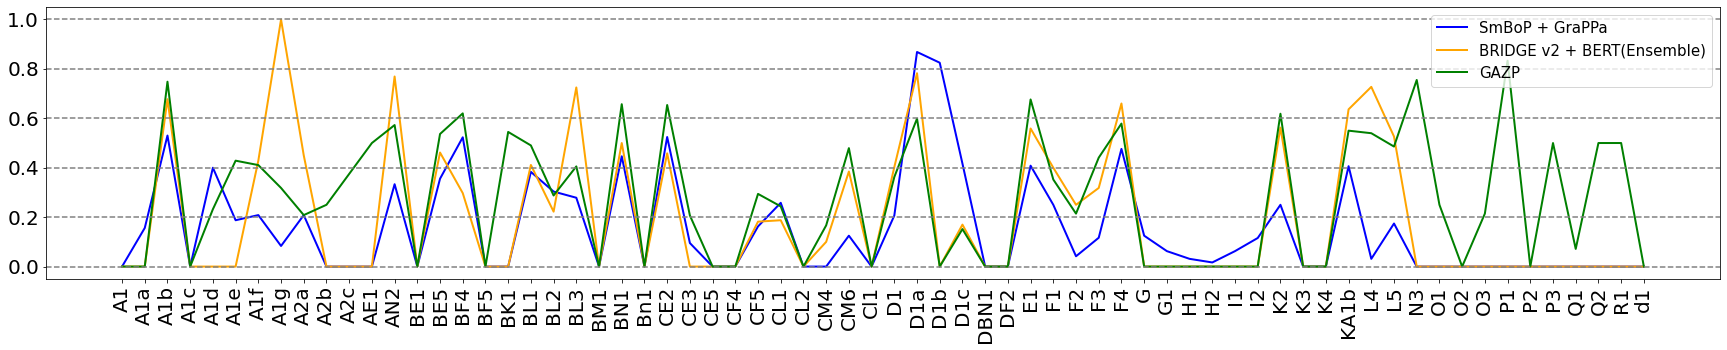

In [36]:
plt.figure(figsize=(30,5))
x_axis = np.linspace(0,15,len(d.index)) 
m1 = d['m1']
m2 = d['m2']
m3 = d['m3']
plt.plot(m1, label='SmBoP + GraPPa', color = 'blue',linewidth= 2)
plt.plot(m2, label='BRIDGE v2 + BERT(Ensemble)',color = 'orange', linewidth= 2) 
plt.plot(m3, label='GAZP', color = 'green',linewidth= 2)
plt.legend(prop={'size': 15})
plt.xticks(fontsize=20,rotation =90)
plt.yticks(fontsize=20)
y = [0,0.2,0.4, 0.6, 0.8, 1.0]
for i in y:
    plt.axhline(y=i, color = 'grey', linestyle = '--')
#plt.savefig('newDec.16/similarity among errors.png')
plt.show()


/var/folders/gh/3pd23sd51hn2p7774mv2zt4r0000gn/T/ipykernel_4852/1337744546.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, fontsize=40)


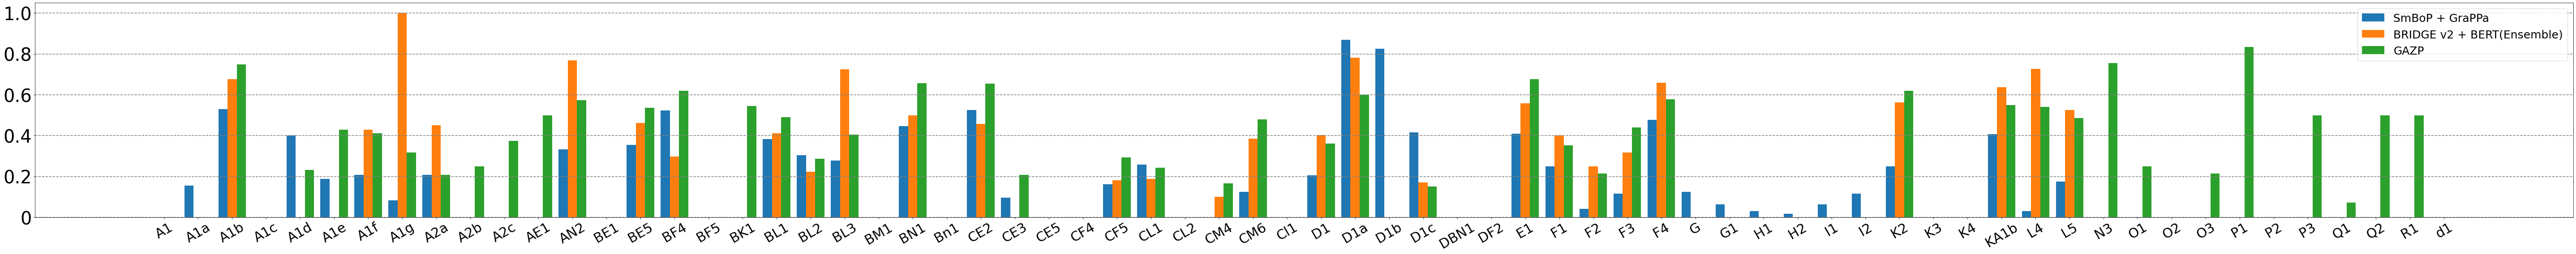

In [44]:
x = np.arange(len(d.index)) 
#y = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]
#y = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]
width = 0.27 

fig, ax = plt.subplots(figsize=(80, 8))
rects1 = ax.bar(x - width, m1, width, label='SmBoP + GraPPa')
rects2 = ax.bar(x, m2, width, label='BRIDGE v2 + BERT(Ensemble)')
rects3 = ax.bar(x + width, m3,  width, label='GAZP')
ax.set_xticks(x)
ax.set_xticklabels(d.index, fontsize=30,rotation =30)
ax.set_yticklabels(y, fontsize=40)

ax.legend(fontsize=30, loc=1, prop={'size': 25})
for i in y:
    plt.axhline(y=i, color = 'grey', linestyle = '--')
#plt.savefig('newDec.16/similarity among errors.png')
fig.tight_layout()
plt.show()

In [ ]:
# Declaring the strings 'a' and 'b':
a = "junk"
b = "clunky"

# Declaring array 'D' with rows = len(a) + 1 and columns = len(b) + 1:
D = [[0 for i in range(len(b) + 1)] for j in range(len(a) + 1)]

# Initialising first row:
for i in range(len(a) + 1):
    D[i][0] = i

# Initialising first column:
for j in range(len(b) + 1):
    D[0][j] = j

for i in range(1, len(a) + 1):
    for j in range(1, len(b) + 1):
        if a[i - 1] == b[j - 1]:
            D[i][j] = D[i - 1][j - 1]
        else:
            # Adding 1 to account for the cost of operation
            insertion = 1 + D[i][j - 1]
            deletion = 1 + D[i - 1][j]
            replacement = 1 + D[i - 1][j - 1]

            # Choosing the best option:
            D[i][j] = min(insertion, deletion, replacement)

print("Levenshtein Distance: ", D[len(a)][len(b)])